<a href="https://colab.research.google.com/github/Moostafaaa/Predicting-Diabetic-Patient-Readmissions/blob/main/proj_Predicting_Diabetic_Patient_Readmissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case

**Predicting Diabetic Patient Readmissions**

High hospital readmission rates drive significant healthcare costs, and diabetic patients face an elevated risk. This project aims to predict the likelihood of readmission for diabetic patients using machine learning. Success will enable targeted interventions to reduce unnecessary readmissions, leading to substantial cost savings and improved patient outcomes. By identifying high-risk individuals, we can optimize care, enhance efficiency, and ultimately improve the well-being of diabetic patients while alleviating the financial burden on healthcare systems. This initiative will develop and validate a predictive model to inform proactive strategies for this vulnerable population.

# Importing Packages and Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
! pip install category-encoders
from category_encoders import BinaryEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
import joblib
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.0 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/diabetic_data.csv')

In [ ]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Data Cleaning

## Dropping ID columns

In [ ]:
# dropping id columns
for col in df.columns:
  if '_id' in col:
    print(col)
    df.drop(col,axis=1,inplace=True)

encounter_id
admission_type_id
discharge_disposition_id
admission_source_id


## Dealing with missing values

In [ ]:
# replace all ? with np.nan
df = df.replace('?', np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   patient_nbr               101766 non-null  int64 
 1   race                      99493 non-null   object
 2   gender                    101766 non-null  object
 3   age                       101766 non-null  object
 4   weight                    3197 non-null    object
 5   time_in_hospital          101766 non-null  int64 
 6   payer_code                61510 non-null   object
 7   medical_specialty         51817 non-null   object
 8   num_lab_procedures        101766 non-null  int64 
 9   num_procedures            101766 non-null  int64 
 10  num_medications           101766 non-null  int64 
 11  number_outpatient         101766 non-null  int64 
 12  number_emergency          101766 non-null  int64 
 13  number_inpatient          101766 non-null  int64 
 14  diag

In [ ]:
df.weight.unique()

array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [ ]:
df.drop('weight',axis=1,inplace=True)

In [ ]:
df.max_glu_serum.unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

In [ ]:
df.A1Cresult.unique()

array([nan, '>7', '>8', 'Norm'], dtype=object)

In [ ]:
df.drop('payer_code',axis=1,inplace=True)

In [ ]:
df.race.unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [ ]:
df.drop(df.index[df.race.isna()] , axis=0, inplace=True)

In [ ]:
df.reset_index(inplace=True,drop=True,)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99493 entries, 0 to 99492
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               99493 non-null  int64 
 1   race                      99493 non-null  object
 2   gender                    99493 non-null  object
 3   age                       99493 non-null  object
 4   time_in_hospital          99493 non-null  int64 
 5   medical_specialty         50727 non-null  object
 6   num_lab_procedures        99493 non-null  int64 
 7   num_procedures            99493 non-null  int64 
 8   num_medications           99493 non-null  int64 
 9   number_outpatient         99493 non-null  int64 
 10  number_emergency          99493 non-null  int64 
 11  number_inpatient          99493 non-null  int64 
 12  diag_1                    99474 non-null  object
 13  diag_2                    99157 non-null  object
 14  diag_3                

In [ ]:
df.medical_specialty.unique()

array(['Pediatrics-Endocrinology', nan, 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Otolaryngology', 'Surgery-Colon&Rectal',
       'Pediatrics-CriticalCare', 'Endocrinology', 'Hematology/Oncology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [ ]:
def speciality(value):
  if type(value) == float:
    return 'other'
  if 'Surgery' in value:
    return 'surgery'
  elif 'Family' in value:
    return 'family'
  elif 'Cardiology' in value:
    return 'Cardiology'
  elif value == 'not measured':
    return 'not measured'
  elif value == 'InternalMedicine':
    return 'InternalMedicine'
  else:
    return 'other'

In [ ]:
df.medical_specialty = df.medical_specialty.apply(speciality)

In [ ]:
df.medical_specialty.unique()

array(['other', 'InternalMedicine', 'family', 'Cardiology', 'surgery'],
      dtype=object)

In [ ]:
def glucose(value):
  if value == '>300':
    return 2
  elif value == '>200':
    return 1
  else:
    return 0

In [ ]:
df.max_glu_serum = df.max_glu_serum.apply(glucose)

In [ ]:
df.max_glu_serum.unique()

array([0, 2, 1])

In [ ]:
def a1c(value):
  if value == '>7':
    return 1
  elif value == '>8':
    return 2
  else:
    return 0

In [ ]:
df.A1Cresult = df.A1Cresult.apply(a1c)

In [ ]:
def age(value):
  if value == '[0-10)':
    return 5
  elif value == '[10-20)':
    return 15
  elif value == '[20-30)':
    return 25
  elif value == '[30-40)':
    return 35
  elif value == '[40-50)':
    return 45
  elif value == '[50-60)':
    return 55
  elif value == '[60-70)':
    return 65
  elif value == '[70-80)':
    return 75
  elif value == '[80-90)':
    return 85
  else:
    return 90



In [ ]:
df.age = df.age.apply(age)

In [ ]:
df.duplicated().sum()

np.int64(0)

## Data Exploration

In [ ]:
# selecting columns with data object type
for col in df.select_dtypes(include=['object']).columns:
  print(col, df[col].unique())

race ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
gender ['Female' 'Male' 'Unknown/Invalid']
medical_specialty ['other' 'InternalMedicine' 'family' 'Cardiology' 'surgery']
diag_1 ['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157'
 '518' '999' '410' '682' '402' 'V57' '189' '786' '427' '996' '277' '584'
 '462' '473' '411' '174' '486' '998' '511' '432' '626' '295' '196' '250.6'
 '182' '845' '423' '808' '250.4' '722' '403' '250.11' '784' '707' '440'
 '151' '715' '997' '198' '564' '38' '590' '578' '250.32' '433' '569' '185'
 '536' '255' '250.13' '599' '558' '574' '491' '560' '244' '250.03' '577'
 '730' '188' '824' '250.8' '332' '562' '291' '296' '510' '401' '263' '438'
 '70' '250.02' '493' '642' '571' '738' '593' '618' '250.42' '807' '456'
 '446' '572' '575' '250.41' '820' '515' '780' '250.22' '995' '235'
 '250.82' '721' '787' '556' '162' '724' '282' '514' 'V55' '281' '250.33'
 '530' '466' '435' '250.12' 'V53' '789' '566' '822' '191' '557' '733'
 '455' '711'

In [ ]:
df.describe()

,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult
count,9.949300e+04,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000
mean,5.456413e+07,65.818450,4.398420,43.072588,1.340577,16.026605,0.373353,0.201341,0.643101,7.439217,0.039922,0.197521
std,3.866461e+07,15.713493,2.986977,19.695858,1.703717,8.119790,1.276799,0.939977,1.271365,1.926064,0.252026,0.564395
min,1.350000e+02,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.346008e+07,55.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,4.598436e+07,65.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,8.779702e+07,75.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000
max,1.895026e+08,90.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,2.000000,2.000000


# From data exploration, we found:

**1- Feature [metformin-rosiglitazone] = 'NO' by 100%**

**2- Feature [examide] = 'NO' by 100%**

**3- Feature [citoglipton] = 'NO' by 100%**

**So, we will drop them because they will not affect the model predictions.**

In [ ]:
df.drop('metformin-rosiglitazone', axis=1, inplace=True)
df.drop('examide', axis=1, inplace=True)
df.drop('citoglipton', axis=1, inplace=True)

In [ ]:
# value count of columns with data object type
for col in df.select_dtypes(include=['object']).columns:
  print(df[col].value_counts())

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
gender
Female             53575
Male               45917
Unknown/Invalid        1
Name: count, dtype: int64
medical_specialty
other               67834
InternalMedicine    14197
family               7271
Cardiology           5254
surgery              4937
Name: count, dtype: int64
diag_1
428    6739
414    6407
786    3938
410    3518
486    3425
       ... 
391       1
690       1
10        1
52        1
V51       1
Name: count, Length: 714, dtype: int64
diag_2
276     6638
428     6522
250     5879
427     4933
401     3641
        ... 
270        1
863        1
523        1
E945       1
180        1
Name: count, Length: 745, dtype: int64
diag_3
250    11227
401     8098
276     5100
428     4496
427     3871
       ...  
7          1
669        1
875        1
671        1
971        1
Name: count, Length: 786, dtype: int64
metfor

# Data Visualization

**Gender vs. Readmitted**

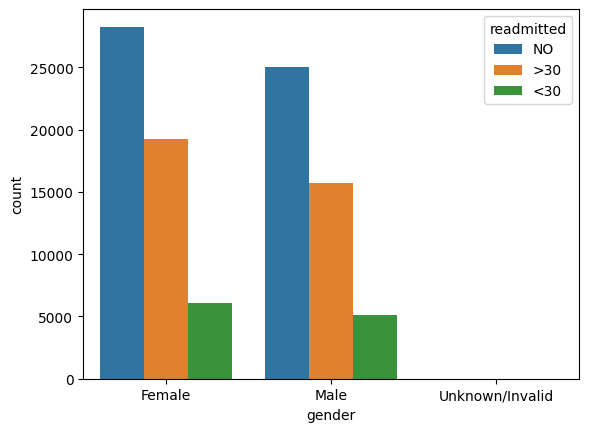

In [ ]:
# visualization Gender vs. Readmitted
sns.countplot(x='gender', hue='readmitted', data=df)
plt.show()


**Race vs. Readmitted**

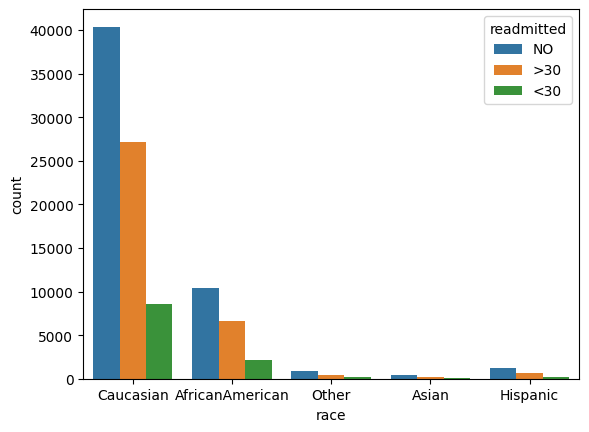

In [ ]:
sns.countplot(x='race', hue='readmitted', data=df)
plt.show()

**Readmitted Pie Chart**

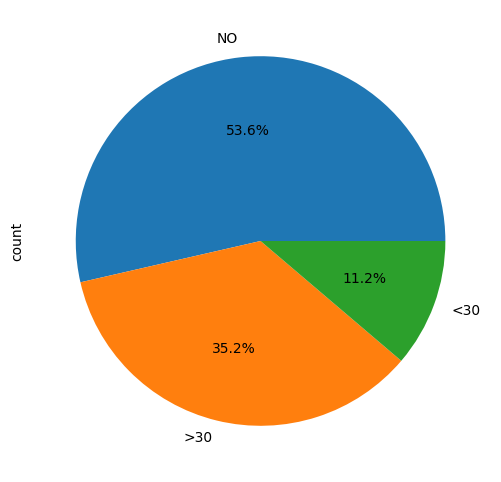

In [ ]:
# pie chart of readmitted label
df['readmitted'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.show()

# Data Wrangling

## Feature Transformation

In [ ]:
'''
race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
'''

race_mapping = {
    'Caucasian': 'Caucasian',
    'AfricanAmerican': 'AfricanAmerican',
    'Hispanic': 'Other',
    'Other': 'Other',
    'Asian': 'Other'
}

df['race'] = df['race'].map(race_mapping)

In [ ]:
'''
gender
Female             53575
Male               45917
Unknown/Invalid        1
'''
df.drop(df[df['gender'] == 'Unknown/Invalid'].index, axis=0, inplace=True)



In [ ]:
'''
Values of the primary diagnosis diag_1 in the final dataset. In the analysis, groups that covered less than 3.5% of
encounters were grouped into “other” category.
I will re-group the data to main groups
'''

def map_icd9_to_group(icd9_code):
    """
    Maps ICD-9 code to its corresponding group name based on predefined ranges.

    Args:
        icd9_code (str or float or int): The ICD-9 code to be mapped

    Returns:
        str: The group name ('Circulatory', 'Respiratory', etc. or 'Other' if not in main groups)
    """
    # Convert to string and handle decimal points (like 250.xx becomes '250')
    code_str = str(icd9_code).split('.')[0]

    try:
        code_num = int(code_str)
    except ValueError:
        # Handle cases like 'E-V' or other non-numeric codes
        if str(icd9_code).upper().startswith('E') or str(icd9_code).upper().startswith('V'):
            return 'Other'
        return 'Other'

    # Define the ranges for each group
    group_ranges = {
        'Circulatory': [(390, 459), (785, 785)],
        'Respiratory': [(460, 519), (786, 786)],
        'Digestive': [(520, 579), (787, 787)],
        'Diabetes': [(250, 250)],  # 250.xx
        'Injury': [(800, 999)],
        'Musculoskeletal': [(710, 739)],
        'Genitourinary': [(580, 629), (788, 788)],
        'Neoplasms': [(140, 239)],
        'Other': [
            (780, 781), (784, 784), (790, 799),  # Other symptoms
            (240, 279),  # Endocrine (excluding 250 which is Diabetes)
            (680, 709), (782, 782),  # Skin
            (1, 139),  # Infectious
            (290, 319),  # Mental
            (280, 289),  # Blood
            (320, 359),  # Nervous system
            (630, 679),  # Pregnancy
            (360, 389),  # Sense organs
            (740, 759)  # Congenital anomalies
        ]
    }

    # Check each group's ranges
    for group, ranges in group_ranges.items():
        for (start, end) in ranges:
            if start <= code_num <= end:
                # Special case for Diabetes - only 250.xx
                if group == 'Diabetes' and '.' in str(icd9_code) and not str(icd9_code).startswith('250.'):
                    continue
                # Special case for Endocrine - exclude 250
                if group == 'Other' and any(s <= code_num <= e for (s, e) in [(240, 279)]):
                    if code_num == 250:
                        continue
                return group

    return 'Other'

# Example usage:
print(map_icd9_to_group('250.10'))  # Diabetes
print(map_icd9_to_group('454.9'))   # Circulatory
print(map_icd9_to_group('740.0'))   # Other (Congenital anomalies)
print(map_icd9_to_group('E123'))    # Other
print(map_icd9_to_group('V45'))     # Other


Diabetes
Circulatory
Other
Other
Other


In [ ]:
df['diag_1'] = df['diag_1'].apply(map_icd9_to_group)

In [ ]:
df['diag_1'].value_counts()

,count
diag_1,
Circulatory,29753
Other,17745
Respiratory,14109
Digestive,9297
Diabetes,8568
Injury,6815
Genitourinary,5026
Musculoskeletal,4826
Neoplasms,3353


In [ ]:
df.drop(columns=['diag_2', 'diag_3'], inplace=True, axis=1)

In [ ]:
'''
metformin , repaglinide, nateglinide, glimepiride,glipizide,glyburide,pioglitazone
, rosiglitazone,glyburide-metformin  : map to 0,1

chlorpropamide,acetohexamide,acarbose,miglitol,troglitazone,tolazamide
, glipizide-metformin,glimepiride-pioglitazone, metformin-pioglitazone:
 remove (less than 1%), very low variance
'''

map_list = ['metformin', 'repaglinide', 'nateglinide',
 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'glyburide-metformin']

drugs_map = {
    'No' : 0,
    'Up' : 1,
    'Down' : 1,
    'Steady' : 1
}

for col in map_list:
  df[col] = df[col].map(drugs_map)


In [ ]:
drop_list = ['chlorpropamide', 'acetohexamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glipizide-metformin',
             'glimepiride-pioglitazone', 'metformin-pioglitazone']

for col in drop_list:
  df.drop(col, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99492 entries, 0 to 99492
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_nbr          99492 non-null  int64 
 1   race                 99492 non-null  object
 2   gender               99492 non-null  object
 3   age                  99492 non-null  int64 
 4   time_in_hospital     99492 non-null  int64 
 5   medical_specialty    99492 non-null  object
 6   num_lab_procedures   99492 non-null  int64 
 7   num_procedures       99492 non-null  int64 
 8   num_medications      99492 non-null  int64 
 9   number_outpatient    99492 non-null  int64 
 10  number_emergency     99492 non-null  int64 
 11  number_inpatient     99492 non-null  int64 
 12  diag_1               99492 non-null  object
 13  number_diagnoses     99492 non-null  int64 
 14  max_glu_serum        99492 non-null  int64 
 15  A1Cresult            99492 non-null  int64 
 16  metformin

In [ ]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['gender'] = df['gender'].apply(lambda x: 0 if x.lower().strip() == 'male' else 1 if x.lower().strip() == 'female' else None)

In [ ]:
df.race.unique()

array(['Caucasian', 'AfricanAmerican', 'Other'], dtype=object)

# Data Checkpoint #1

In [ ]:
df.to_csv('diabetic_preprocessed_f.csv', index=False)

# Data Preprocessing

In [ ]:
## df = pd.read_csv('/content/diabetic_preprocessed_f.csv')
df.head()

,patient_nbr,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,8222157,Caucasian,1,5,1,other,41,0,1,0,...,0,0,No,0,0,No,0,No,No,NO
1,55629189,Caucasian,1,15,3,other,59,0,18,0,...,0,0,No,0,0,Up,0,Ch,Yes,>30
2,86047875,AfricanAmerican,1,25,2,other,11,5,13,2,...,1,0,No,0,0,No,0,No,Yes,NO
3,82442376,Caucasian,0,35,2,other,44,1,16,0,...,0,0,No,0,0,Up,0,Ch,Yes,NO
4,42519267,Caucasian,0,45,1,other,51,0,8,0,...,1,0,No,0,0,Steady,0,Ch,Yes,NO


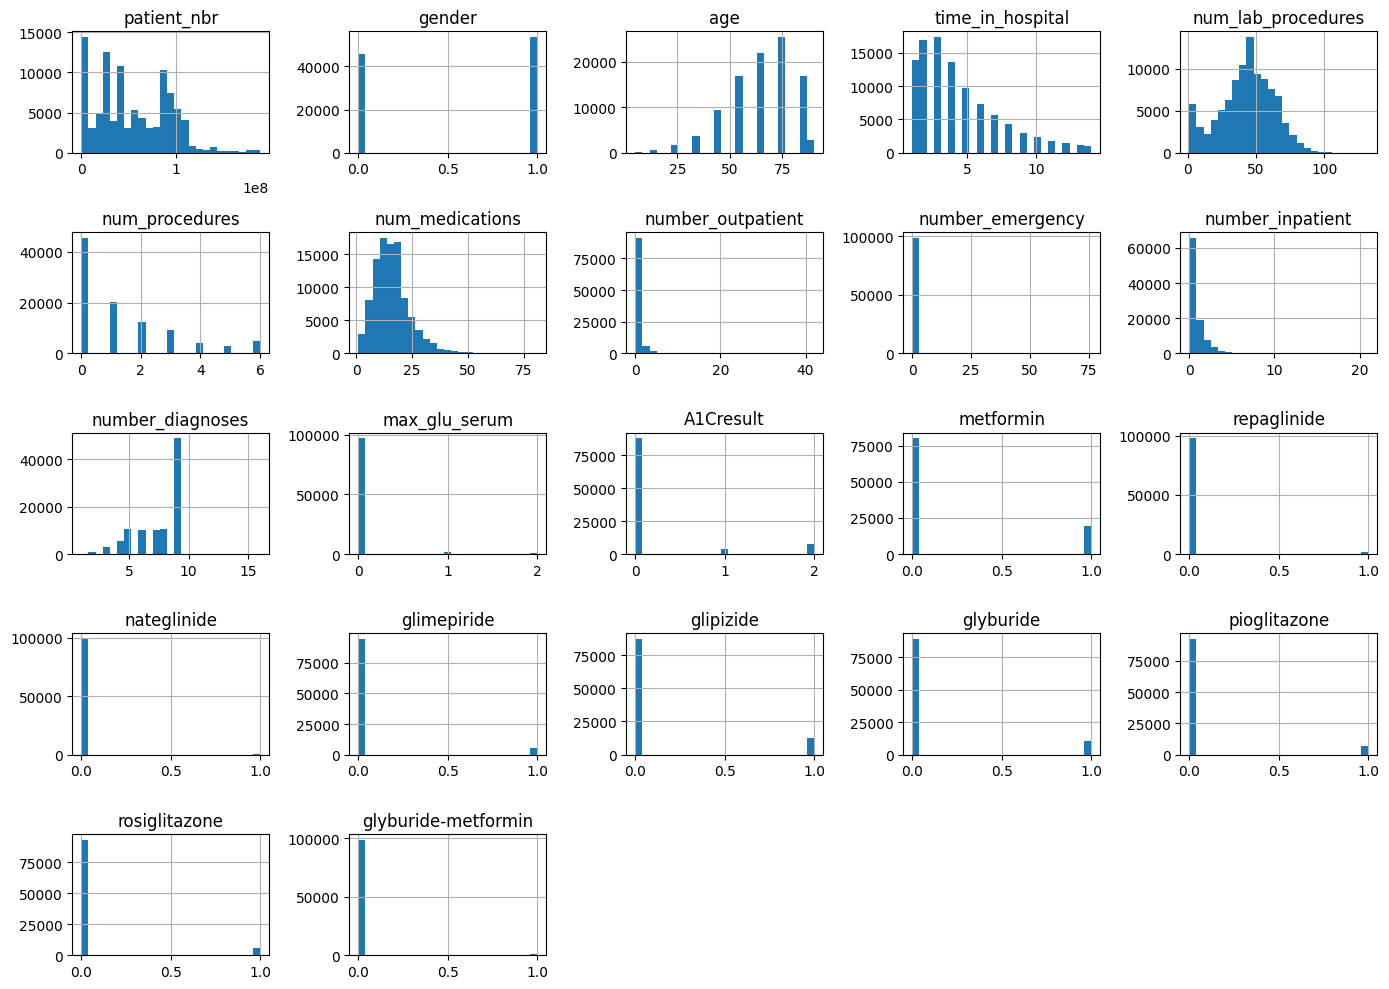

In [ ]:
df.hist(bins=25, figsize=(14, 10))
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'number_diagnoses', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'glimepiride',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'glyburide-metformin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df.readmitted.value_counts()

,count
readmitted,
NO,53316
>30,35007
<30,11169


In [ ]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1 )

## Feature Transformation

In [ ]:
# log transformation

df['LOG_patient_nbr'] = np.log1p(df['patient_nbr'])

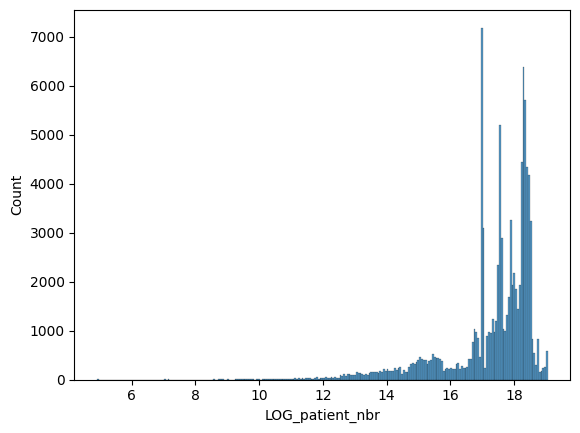

In [ ]:
sns.histplot(data=df, x='LOG_patient_nbr', kde=False)
plt.show()

In [ ]:
df.drop(['patient_nbr'], axis=1, inplace=True)

# Data Checkpoint #2

In [ ]:
df.to_csv('diabetic_final_pre.csv', index=False)

In [ ]:
df = pd.read_csv('/content/diabetic_final_pre.csv')

## Data Encoding and Scaling

In [ ]:
df_cat = df.select_dtypes(include=['object'])
cat_cols= df_cat.columns

In [ ]:
num_cols = [col for col in df.columns if col not in df_cat.columns]
print(num_cols)

['gender', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'glyburide-metformin', 'readmitted', 'LOG_patient_nbr']


In [ ]:
df_num = df[num_cols]


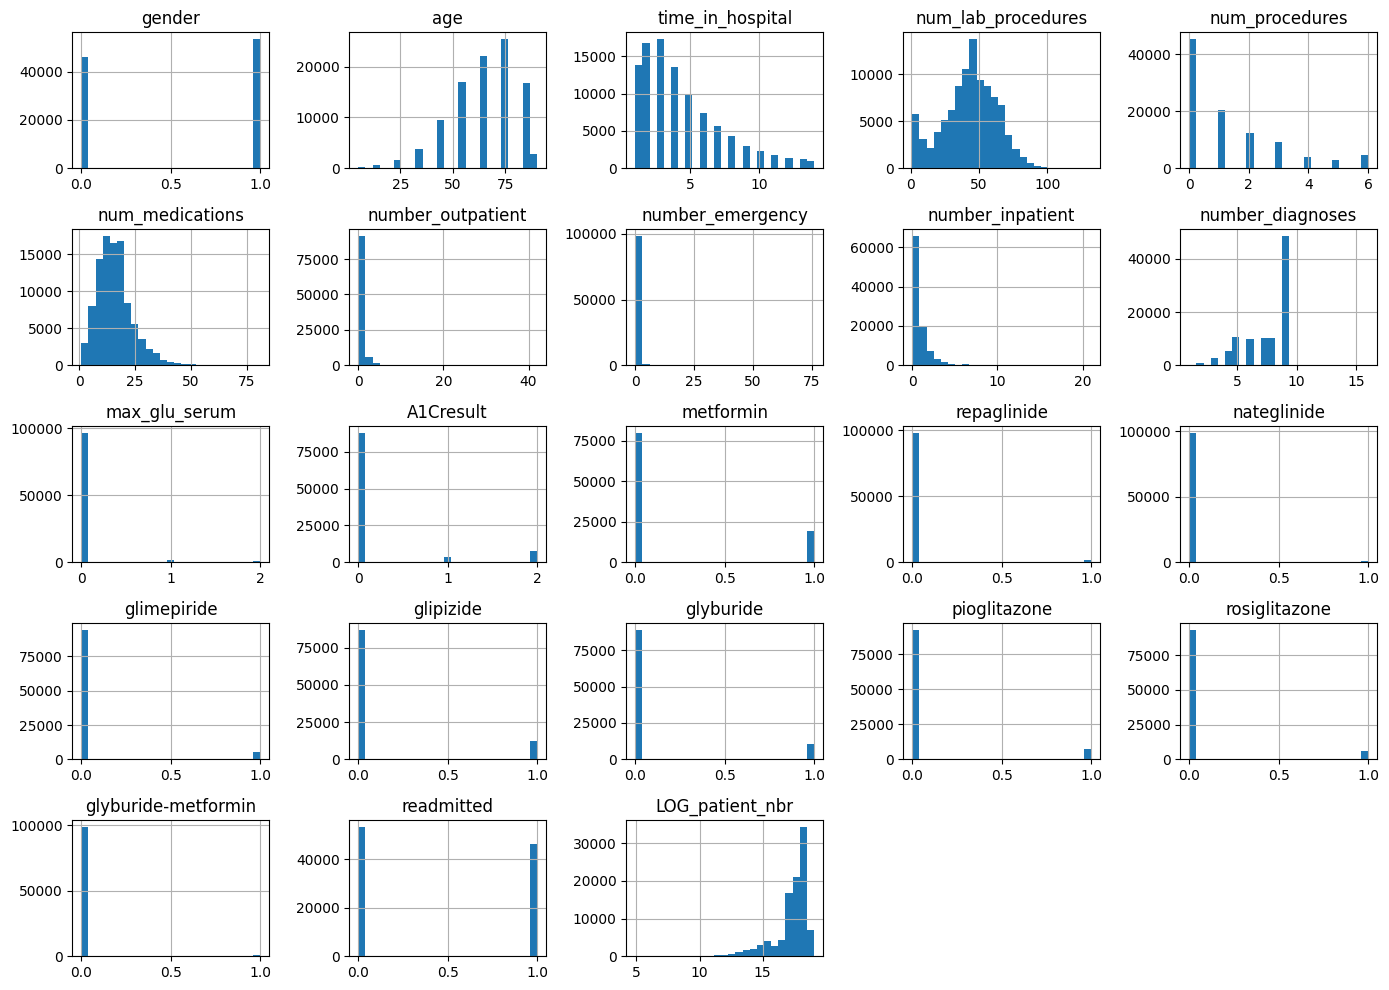

In [ ]:
df_num.hist(bins=25, figsize=(14, 10))
plt.tight_layout()
plt.show()

In [ ]:
num_cols = ['age', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'LOG_patient_nbr', 'time_in_hospital']
#

# Model Comparison and Model Selection

In [ ]:
# Step 1: Identify column types , Split data
categorical_cols = cat_cols
numeric_cols = num_cols
X = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Step 2: Define preprocessing for each column type
preprocessor = ColumnTransformer(
    transformers=[
        ('binary_encoder', BinaryEncoder(), categorical_cols),
        ('robust_scaler', RobustScaler(quantile_range=(25, 75)), numeric_cols)
    ],
    remainder='passthrough'
)


#  Define multiple classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


results = {}
for name, classifier in classifiers.items():
    # Create pipeline with current classifier
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    # Fit pipeline on training data
    model_pipeline.fit(X_train, y_train)

    # Evaluate on test data
    y_pred = model_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[name] = {
        'pipeline': model_pipeline,
        'accuracy': accuracy,
        'report': classification_report(y_test, y_pred)
    }

    # Print results
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(results[name]['report'])

# Find the best model
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")



Logistic Regression:
Accuracy: 0.6172
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.80      0.69     13269
           1       0.64      0.41      0.50     11604

    accuracy                           0.62     24873
   macro avg       0.62      0.60      0.60     24873
weighted avg       0.62      0.62      0.60     24873


Random Forest:
Accuracy: 0.6272
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67     13269
           1       0.62      0.52      0.57     11604

    accuracy                           0.63     24873
   macro avg       0.63      0.62      0.62     24873
weighted avg       0.63      0.63      0.62     24873


Gradient Boosting:
Accuracy: 0.6333
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.75      0.69     13269
           1       0.64      0.50      0.56     11604

    

# Hyperparameter Tuning - Cross Validation

In [ ]:

# Step 1: Identify column types, Split data (as in your original code)
categorical_cols = cat_cols
numeric_cols = num_cols
X = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 2: Define preprocessing (same as your original code)
preprocessor = ColumnTransformer(
    transformers=[
        ('binary_encoder', BinaryEncoder(), categorical_cols),
        ('robust_scaler', RobustScaler(quantile_range=(25, 75)), numeric_cols)
    ],
    remainder='passthrough'
)

# Create pipeline with RandomForest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameter distributions for Random Forest
param_distributions = {
    'classifier__n_estimators': [150, 300],
    'classifier__max_depth': [None, 10, 25],
    'classifier__min_samples_split': [2, 7],
    'classifier__min_samples_leaf': [2, 4],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__bootstrap': [True, False],
    'classifier__class_weight': [None, 'balanced', 'balanced_subsample']
}

# Set up HalvingRandomSearchCV
halving_search = HalvingRandomSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_distributions,
    factor=3,  # Each iteration uses 1/3 of the previous candidates
    resource='n_samples',  # Allocate more samples to promising candidates
    max_resources='auto',  # Use all samples
    # min_resources='exhaust',  # Start with small number of samples
    aggressive_elimination=False,  # Less aggressive elimination
    cv=4,  # 5-fold cross-validation
    scoring='accuracy',
    n_candidates='exhaust',  # Evaluate all candidates in first iteration
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the search
halving_search.fit(X_train, y_train)

# Get the best estimator
best_rf_pipeline = halving_search.best_estimator_

# Evaluate on test data
y_pred = best_rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"\nBest Random Forest after HalvingRandomSearchCV:")
print(f"Best parameters: {halving_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# You can also examine the search results
print("\nSearch results:")
print(f"Number of iterations: {halving_search.n_iterations_}")
print(f"Number of candidates evaluated: {len(halving_search.cv_results_['params'])}")
print(f"Best cross-validation score: {halving_search.best_score_:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 432 is smaller than n_iter=4663. Running 432 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Random Forest after HalvingRandomSearchCV:
Best parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_features': None, 'classifier__max_depth': 10, 'classifier__class_weight': None, 'classifier__bootstrap': False}
Accuracy: 0.6178
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.70      0.66     13269
           1       0.60      0.53      0.56     11604

    accuracy                           0.62     24873
   macro avg       0.62      0.61      0.61     24873
weighted avg       0.62      0.62      0.61     24873


Search results:
Number of iterations: 6
Number of candidates evaluated: 648
Best cross-validation score: 0.5678



<font size="5">We can conclude that the default hyperparameters values have better performance</font>

# Deployment

In [ ]:
# Extract the preprocessor
preprocessor = results[best_model_name]['pipeline'].named_steps['preprocessor']

# Define and train the final Random Forest model with the preprocessor
# retrain on the entire dataset (X, y) for the final model.
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Use the same parameters or tune as needed
])
final_model.fit(X, y)

print("\nFinal Random Forest Model Trained on Full Data.")


Final Random Forest Model Trained on Full Data.


In [ ]:
joblib.dump(final_model, 'final_random_forest_model.joblib')
print("Final model saved as 'final_random_forest_model.joblib'")

Final model saved as 'final_random_forest_model.joblib'


In [ ]:
deploy_pipeline = joblib.load('final_random_forest_model.joblib')

print("Pipeline loaded successfully!")

Pipeline loaded successfully!


In [ ]:
predictions = deploy_pipeline.predict(X_test)

In [ ]:
predictions.shape

(24873,)

In [ ]:
X_test.shape

(24873, 29)